# 100. Boston House Price Regression

- 보스턴 주택가격 예측

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X = boston.data
y = boston.target

In [7]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [8]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [11]:
model = Sequential()

model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


- epoch 수와 batchz_size 변경하며 test

In [14]:
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 18ms/step - loss: 572.4949 - mae: 22.0213 - mse: 572.4949 - val_loss: 525.6391 - val_mae: 21.0592 - val_mse: 525.6391
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 537.9640 - mae: 21.1762 - mse: 537.9640 - val_loss: 487.2600 - val_mae: 20.0853 - val_mse: 487.2600
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 493.9931 - mae: 20.0459 - mse: 493.9931 - val_loss: 436.6335 - val_mae: 18.7115 - val_mse: 436.6335
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 435.5161 - mae: 18.4266 - mse: 435.5161 - val_loss: 370.4497 - val_mae: 16.7305 - val_mse: 370.4497
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 362.2448 - mae: 16.2212 - mse: 362.2448 - val_loss: 290.9932 - val_mae: 14.1752 - val_mse: 290.9932
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 278.3413 - mae: 13.6195 - mse: 278.3413 - val_loss: 210.9281 

Epoch 98/500
12/12 [==============================] - 0s 4ms/step - loss: 14.4924 - mae: 2.6053 - mse: 14.4924 - val_loss: 20.2278 - val_mae: 2.7838 - val_mse: 20.2278
Epoch 99/500
12/12 [==============================] - 0s 4ms/step - loss: 14.5304 - mae: 2.5724 - mse: 14.5304 - val_loss: 20.6545 - val_mae: 2.7605 - val_mse: 20.6545
Epoch 100/500
12/12 [==============================] - 0s 8ms/step - loss: 14.3313 - mae: 2.6011 - mse: 14.3313 - val_loss: 19.9487 - val_mae: 2.8674 - val_mse: 19.9487
Epoch 101/500
12/12 [==============================] - 0s 3ms/step - loss: 14.4234 - mae: 2.5875 - mse: 14.4234 - val_loss: 20.3778 - val_mae: 2.7402 - val_mse: 20.3778
Epoch 102/500
12/12 [==============================] - 0s 3ms/step - loss: 14.3701 - mae: 2.6099 - mse: 14.3701 - val_loss: 19.9529 - val_mae: 2.9047 - val_mse: 19.9529
Epoch 103/500
12/12 [==============================] - 0s 3ms/step - loss: 14.2387 - mae: 2.5722 - mse: 14.2387 - val_loss: 20.1245 - val_mae: 2.7334 - val_m

12/12 [==============================] - 0s 7ms/step - loss: 11.9025 - mae: 2.3511 - mse: 11.9025 - val_loss: 16.9216 - val_mae: 2.6949 - val_mse: 16.9216
Epoch 195/500
12/12 [==============================] - 0s 3ms/step - loss: 11.6638 - mae: 2.4073 - mse: 11.6638 - val_loss: 17.2498 - val_mae: 2.5414 - val_mse: 17.2498
Epoch 196/500
12/12 [==============================] - 0s 4ms/step - loss: 11.2338 - mae: 2.2977 - mse: 11.2338 - val_loss: 16.4070 - val_mae: 2.6410 - val_mse: 16.4070
Epoch 197/500
12/12 [==============================] - 0s 3ms/step - loss: 11.2704 - mae: 2.3059 - mse: 11.2704 - val_loss: 16.7286 - val_mae: 2.5870 - val_mse: 16.7286
Epoch 198/500
12/12 [==============================] - 0s 5ms/step - loss: 11.2026 - mae: 2.3273 - mse: 11.2026 - val_loss: 16.7390 - val_mae: 2.5500 - val_mse: 16.7390
Epoch 199/500
12/12 [==============================] - 0s 4ms/step - loss: 11.1123 - mae: 2.2715 - mse: 11.1123 - val_loss: 16.4385 - val_mae: 2.6690 - val_mse: 16.4385


12/12 [==============================] - 0s 7ms/step - loss: 8.9039 - mae: 2.1035 - mse: 8.9039 - val_loss: 13.9728 - val_mae: 2.4919 - val_mse: 13.9728
Epoch 292/500
12/12 [==============================] - 0s 4ms/step - loss: 8.8677 - mae: 2.0910 - mse: 8.8677 - val_loss: 13.8373 - val_mae: 2.5613 - val_mse: 13.8373
Epoch 293/500
12/12 [==============================] - 0s 3ms/step - loss: 9.0084 - mae: 2.1416 - mse: 9.0084 - val_loss: 14.1773 - val_mae: 2.4571 - val_mse: 14.1773
Epoch 294/500
12/12 [==============================] - 0s 6ms/step - loss: 8.9352 - mae: 2.0961 - mse: 8.9352 - val_loss: 14.0832 - val_mae: 2.5032 - val_mse: 14.0832
Epoch 295/500
12/12 [==============================] - 0s 5ms/step - loss: 8.8210 - mae: 2.0898 - mse: 8.8210 - val_loss: 13.7429 - val_mae: 2.5223 - val_mse: 13.7429
Epoch 296/500
12/12 [==============================] - 0s 4ms/step - loss: 8.8602 - mae: 2.1030 - mse: 8.8602 - val_loss: 13.9836 - val_mae: 2.4772 - val_mse: 13.9836
Epoch 297/50

12/12 [==============================] - 0s 4ms/step - loss: 7.3304 - mae: 1.9441 - mse: 7.3304 - val_loss: 12.2786 - val_mae: 2.4159 - val_mse: 12.2786
Epoch 390/500
12/12 [==============================] - 0s 3ms/step - loss: 7.3956 - mae: 1.9617 - mse: 7.3956 - val_loss: 12.1878 - val_mae: 2.4398 - val_mse: 12.1878
Epoch 391/500
12/12 [==============================] - 0s 3ms/step - loss: 7.4577 - mae: 1.9583 - mse: 7.4577 - val_loss: 12.1555 - val_mae: 2.4535 - val_mse: 12.1555
Epoch 392/500
12/12 [==============================] - 0s 3ms/step - loss: 7.6138 - mae: 1.9871 - mse: 7.6138 - val_loss: 12.8559 - val_mae: 2.4030 - val_mse: 12.8559
Epoch 393/500
12/12 [==============================] - 0s 5ms/step - loss: 7.6524 - mae: 2.0170 - mse: 7.6524 - val_loss: 12.2908 - val_mae: 2.5042 - val_mse: 12.2908
Epoch 394/500
12/12 [==============================] - 0s 5ms/step - loss: 7.4224 - mae: 1.9614 - mse: 7.4224 - val_loss: 12.0085 - val_mae: 2.4402 - val_mse: 12.0085
Epoch 395/50

12/12 [==============================] - 0s 5ms/step - loss: 6.3243 - mae: 1.8218 - mse: 6.3243 - val_loss: 11.2440 - val_mae: 2.3943 - val_mse: 11.2440
Epoch 488/500
12/12 [==============================] - 0s 3ms/step - loss: 6.3156 - mae: 1.8210 - mse: 6.3156 - val_loss: 11.2264 - val_mae: 2.3421 - val_mse: 11.2264
Epoch 489/500
12/12 [==============================] - 0s 5ms/step - loss: 6.2945 - mae: 1.8229 - mse: 6.2945 - val_loss: 11.3547 - val_mae: 2.4019 - val_mse: 11.3547
Epoch 490/500
12/12 [==============================] - 0s 5ms/step - loss: 6.2442 - mae: 1.8270 - mse: 6.2442 - val_loss: 11.6919 - val_mae: 2.3464 - val_mse: 11.6919
Epoch 491/500
12/12 [==============================] - 0s 3ms/step - loss: 6.3268 - mae: 1.8398 - mse: 6.3268 - val_loss: 11.6804 - val_mae: 2.4764 - val_mse: 11.6804
Epoch 492/500
12/12 [==============================] - 0s 4ms/step - loss: 6.3833 - mae: 1.8308 - mse: 6.3833 - val_loss: 11.2406 - val_mae: 2.3545 - val_mse: 11.2406
Epoch 493/50

In [15]:
model.evaluate(X_test, y_test, verbose=0)

[11.240382194519043, 2.408585786819458, 11.240382194519043]

In [27]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 997us/step


In [28]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 7.96
R2 score: 0.90


Text(0.5, 1.0, 'Boston House Price Prediction - Neural Network ($1,000)')

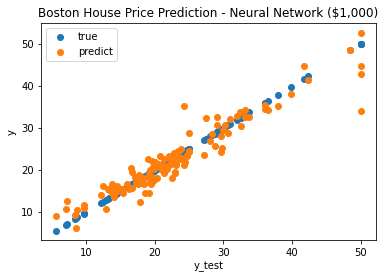

In [29]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction - Neural Network ($1,000)')

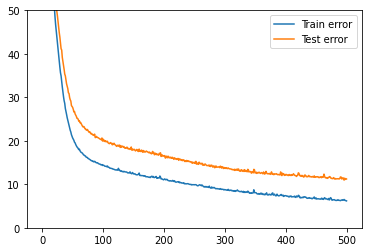

In [19]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn LinearRegression 비교

In [20]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [21]:
regr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regr.predict(X_test)

In [23]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 21.24
R2 score: 0.74


In [24]:
y_test.shape, y_pred.shape

((127,), (127,))

Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

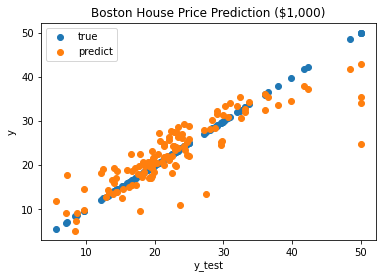

In [26]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction - sklearn ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [ ]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
        "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산

### 시각화